# EMU Plotting and Analysis Tool Example: Attribution Tool

## Load Modules

In [55]:
## Load modules
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import runpy
from os.path import join,expanduser

# The following are needed to load the plotting tool as a module
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'efs_ecco/ameza'))

from time_series_analysis import * 
# Reproudce plot generated by Method 1
import plot_atrb

import matplotlib as mpl
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid')
mpl.rcParams['figure.dpi'] = 120

## Load Modules

In [90]:
var_label = {"lhs":"temperature anomaly", "wind":"wind contr.", 
             "htflx":"htflx contr.", "pload":"pload contr.", 
             "fwflx":"fwflx contr.", "ic": "ic contr.", 
             "sflx":"sflx contr."}
var_alpha = {"lhs":0.9, "wind":0.9, 
             "htflx":0.9, "pload":0.3, 
             "fwflx":0.3, "ic": 0.3, 
             "sflx":0.3}
# sns.color_palette()


var_color = {"lhs":"k", "wind":sns.color_palette("tab10")[0], 
             "htflx":sns.color_palette("tab10")[1], "pload":sns.color_palette("tab10")[2], 
             "fwflx":sns.color_palette("tab10")[3], "ic": sns.color_palette("tab10")[4], 
             "sflx":sns.color_palette("tab10")[5]}

def extract_attribution_ds(return_vars_dict):
    # Extract data and set title for the plot
    atrb_t = return_vars_dict['time_values'] 
    atrb = return_vars_dict['variable']
    fctrl = return_vars_dict['ctrl_name']
    frun_file = return_vars_dict['plot_title']
    nterms = len(fctrl)
    fld_all = return_vars_dict['variable'] 
    # number of time steps in your data
    nt = len(atrb_t)
    # (a) by explicit start/end:
    dates = pd.date_range(start="1992-01-01", end="2017-12-31", freq="MS")
    
    ds_full = xr.Dataset(
        { name: (("time",), np.float32(fld_all[i, :]))
          for i, name in enumerate(fctrl)
        },
        coords={"time": dates}
    )
    return ds_full

def plot_attribution_ds(fig, ax, ds, detrend = False):
    for var in ds.data_vars:
        if detrend: 
            ds_var = detrend_da(ds[var])
        else:
            ds_var = ds[var] 
        ds_var = ds_var - ds_var.mean("time")
        ds_var.plot(ax=ax, label=var_label[var], c = var_color[var], alpha = var_alpha[var])
        
    ax.set_xlabel("time")
    ax.legend()

In [91]:
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.

# Attribution Tool
globals_dict = ept.emu_plot(run_name="/efs_ecco/ameza/ECCO/EMU/sampling_ccc_surf/emu_atrb_m_3_CCC_surf_mask.bin_1");

globals_dict.get('return_vars').keys()

# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')
#  More variables used by ept
# emu = globals_dict.get('return_vars')

# Check the keys in the dictionary
return_vars_dict.keys()

surf_attr = extract_attribution_ds(return_vars_dict)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ameza/ECCO/EMU/sampling_ccc_surf/emu_atrb_m_3_CCC_surf_mask.bin_1

Reading /efs_ecco/ameza/ECCO/EMU/sampling_ccc_surf/emu_atrb_m_3_CCC_surf_mask.bin_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/ameza/ECCO/EMU/sampling_ccc_surf/emu_atrb_m_3_CCC_surf_mask.bin_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ameza/ECCO/EMU/sampling_ccc_surf/emu_atrb_m_3_CCC_surf_mask.bin_1/output/atrb.step_312


***********************
EMU variables read as global variables in module global_emu_var (

Text(0.5, 1.0, 'Mixed Layer Temp. Anom. in ECCO V4r4\n(Nbox + Sbox)')

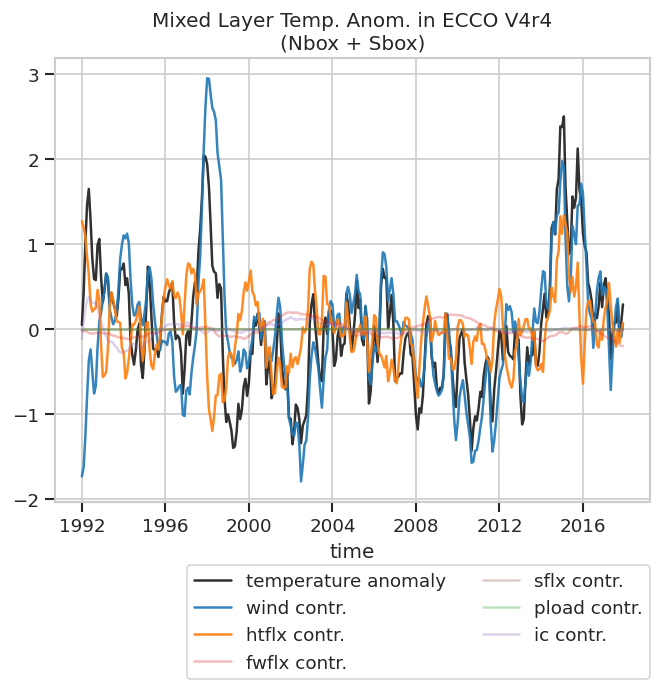

In [92]:
fig, ax = plt.subplots()
plot_attribution_ds(fig, ax, remove_seasonal_cycle(surf_attr), detrend = True)
ax.tick_params(
    axis="both",        # apply to the y-axis
    which="both",    # both major and minor ticks
    left=True,       # turn left ticks on
    right=False,     # turn right ticks off
    bottom = True,
    labelleft=True   # show labels on the left
)

# place legend outside the axes
ax.legend(
    ncols=2,
    loc="lower right",
    bbox_to_anchor=(1.00, -0.40),   # x=1.02 puts it just right of the axes; y=1 aligns top
    borderaxespad=0, # no padding between axes and legend box
    frameon = True
)
ax.set_title("Mixed Layer Temp. Anom. in ECCO V4r4\n(Nbox + Sbox)")

In [93]:
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.

# Attribution Tool
globals_dict = ept.emu_plot(run_name="/efs_ecco/ameza/ECCO/EMU/sampling_ccc_subsurf/emu_atrb_m_3_CCC_sub_surf_mask.bin_1");

globals_dict.get('return_vars').keys()

# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')
#  More variables used by ept
# emu = globals_dict.get('return_vars')

# Check the keys in the dictionary
return_vars_dict.keys()

subsurf_attr = extract_attribution_ds(return_vars_dict)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ameza/ECCO/EMU/sampling_ccc_subsurf/emu_atrb_m_3_CCC_sub_surf_mask.bin_1

Reading /efs_ecco/ameza/ECCO/EMU/sampling_ccc_subsurf/emu_atrb_m_3_CCC_sub_surf_mask.bin_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/ameza/ECCO/EMU/sampling_ccc_subsurf/emu_atrb_m_3_CCC_sub_surf_mask.bin_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ameza/ECCO/EMU/sampling_ccc_subsurf/emu_atrb_m_3_CCC_sub_surf_mask.bin_1/output/atrb.step_312


***********************
EMU variables read as global variable

Text(0.5, 1.0, 'Subsurface Layer Temp. Anom. in ECCO V4r4\n(Nbox + Sbox)')

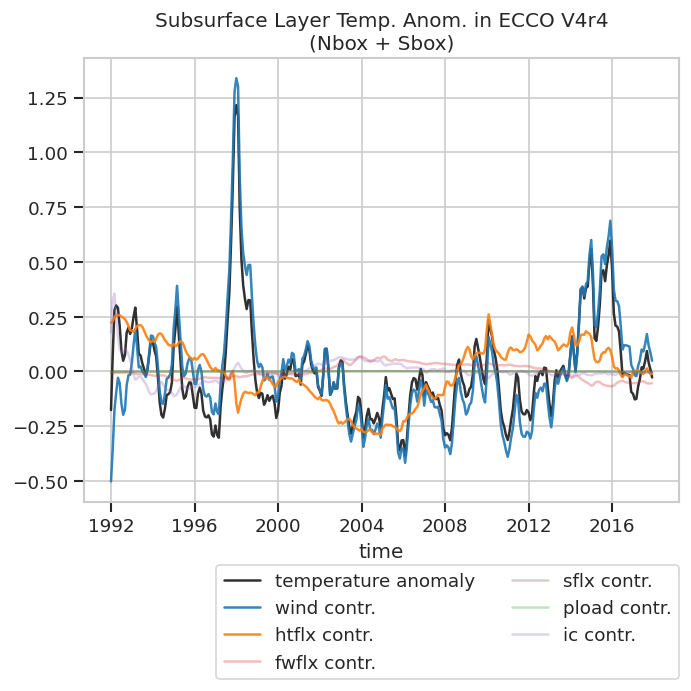

In [94]:
fig, ax = plt.subplots()
plot_attribution_ds(fig, ax, remove_seasonal_cycle(subsurf_attr), detrend = True)
ax.tick_params(
    axis="both",        # apply to the y-axis
    which="both",    # both major and minor ticks
    left=True,       # turn left ticks on
    right=False,     # turn right ticks off
    bottom = True,
    labelleft=True   # show labels on the left
)

# place legend outside the axes
ax.legend(
    ncols=2,
    loc="lower right",
    bbox_to_anchor=(1.00, -0.40),   # x=1.02 puts it just right of the axes; y=1 aligns top
    borderaxespad=0, # no padding between axes and legend box
    frameon = True
)
ax.set_title("Subsurface Layer Temp. Anom. in ECCO V4r4\n(Nbox + Sbox)")